In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv('/Users/nandanpatel/Projects/Movie Recomendation System/Content based/dataset/preprocessed_data.csv')

In [3]:
movies.head(5)

,Unnamed: 0,movie_id,title,tags
0,0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [4]:
import nltk
from nltk.stem.porter import PorterStemmer

In [5]:
ps = PorterStemmer()
def stem(text):
    L = []
    for i in text.split():
        L.append(ps.stem(i))
    return " ".join(L)

In [6]:
movies['tags'] = movies['tags'].apply(stem)

In [7]:
movies.head(5)

,Unnamed: 0,movie_id,title,tags
0,0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [9]:
vectors = cv.fit_transform(movies['tags']).toarray()

In [10]:
for i in cv.get_feature_names_out():
    print(i)

000
007
10
100
11
12
13
14
15
16
17
18
18th
19
1910
1920
1930
1940
1950
1950s
1960
1960s
1970
1970s
1980
1985
1990
19th
19thcenturi
20
200
2009
20th
24
25
30
300
3d
40
50
500
60
70
aaron
aaroneckhart
aarontaylor
abandon
abduct
abigailbreslin
abil
abl
aboard
abov
abus
academ
academi
accept
access
accid
accident
acclaim
accompani
accomplish
account
accus
ace
achiev
acquaint
act
action
actionhero
activ
activist
activities
actor
actress
actual
ad
adam
adambrodi
adamsandl
adamshankman
adapt
add
addict
adjust
admir
admit
adolesc
adopt
ador
adrienbrodi
adult
adultanim
adulteri
adulthood
advanc
adventur
adventure
adventures
advertis
advic
advis
affair
affect
afghanistan
africa
african
africanamerican
aftercreditssting
afterlif
aftermath
ag
age
agediffer
agenc
agency
agenda
agent
agents
aggress
ago
agre
ahead
aid
aidanquinn
ail
aim
air
airplan
airplanecrash
airport
aka
al
alabama
alan
alanalda
alanarkin
alaska
albert
albertbrook
alcohol
alecbaldwin
alex
alexkendrick
alfredhitchcock
alfredmolina

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
similarity = cosine_similarity(vectors)

In [13]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1])

[(0, 1.0000000000000002),
 (1214, 0.28676966733820225),
 (2405, 0.26310068027921696),
 (507, 0.255608593705383),
 (3728, 0.25391668753850405),
 (539, 0.2467838236981868),
 (582, 0.24511108480187255),
 (1202, 0.23918243661746996),
 (1192, 0.2367785320221084),
 (61, 0.23179316248638276),
 (778, 0.2294157338705618),
 (1916, 0.2252817784447915),
 (4046, 0.22329687826943603),
 (2782, 0.22269966704152225),
 (172, 0.21239769762143662),
 (972, 0.2073221072156823),
 (2969, 0.20602141085758227),
 (322, 0.20519567041703082),
 (2329, 0.20443988269091456),
 (3606, 0.20437977982832192),
 (4190, 0.2029530274475215),
 (1440, 0.20277677641345318),
 (1087, 0.2020475485519274),
 (260, 0.20073876713674155),
 (74, 0.20054543301971392),
 (151, 0.19867985355975665),
 (3671, 0.1979082783981174),
 (973, 0.19767387315371682),
 (577, 0.1976738731537168),
 (47, 0.19529164171612676),
 (3325, 0.19117977822546817),
 (1199, 0.19088542889273336),
 (942, 0.1892994097121204),
 (27, 0.18848425873126295),
 (305, 0.1884842

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_content_recommendations(titles, scores):
    df_heat = pd.DataFrame(scores, index=titles, columns=["Similarity Score"])

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    axes[0].barh(titles[::-1], scores[::-1], color='lightcoral')
    axes[0].set_xlabel('Similarity Score')
    axes[0].set_title('Top Content-Based Recommended Movies')

    sns.heatmap(df_heat, annot=True, cmap='YlGnBu', fmt=".4f", ax=axes[1],
                cbar=True, linewidths=0.5, linecolor='black')
    axes[1].set_title("Similarity Heatmap")

    plt.tight_layout()
    plt.show()

def recommendation(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = similarity[index]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:11]

    titles = []
    scores = []

    print(f"\n Top 10 Recommendations for: {movie}\n")
    for i in movie_list:
        title = movies.iloc[i[0]].title
        print(title)
        titles.append(title)
        scores.append(i[1])

    plot_content_recommendations(titles, scores)


 Top 10 Recommendations for: Avatar

Aliens vs Predator: Requiem
Aliens
Independence Day
Falcon Rising
Titan A.E.
Battle: Los Angeles
Predators
Small Soldiers
Jupiter Ascending
Meet Dave


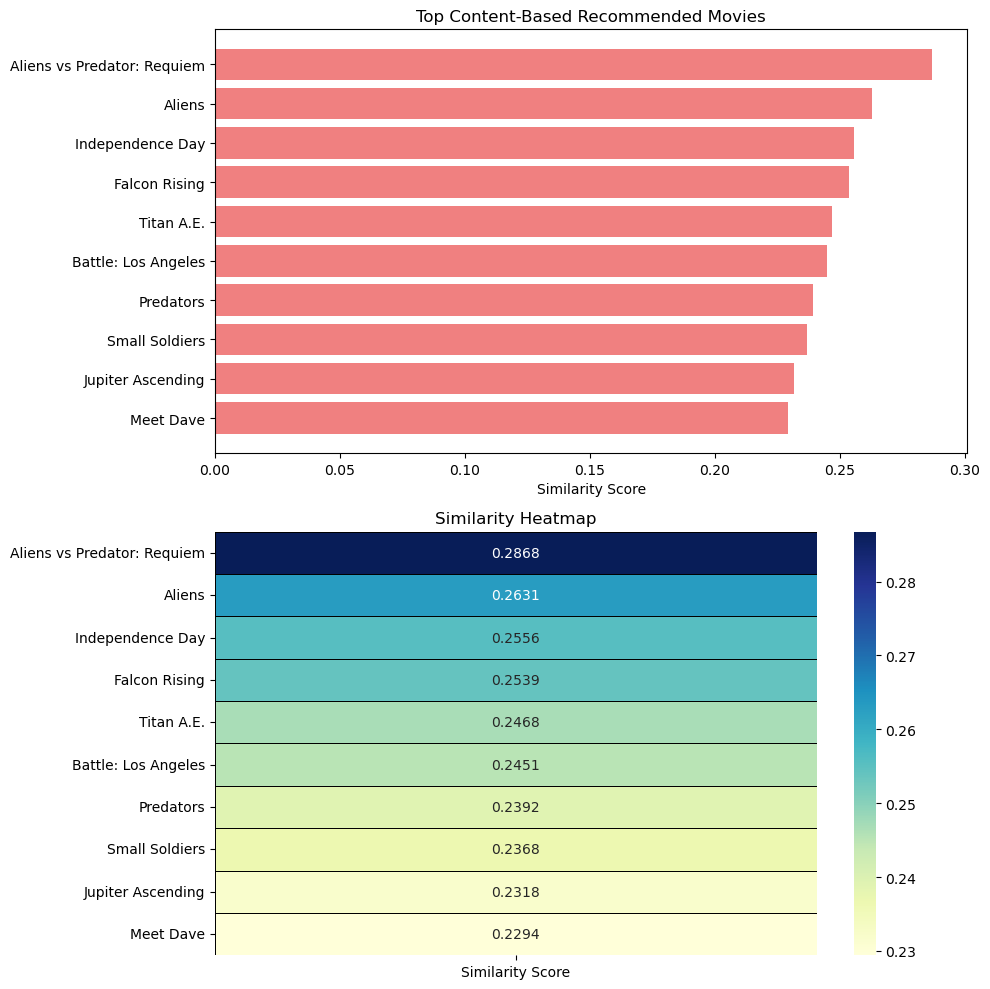

In [25]:
recommendation('Avatar')

In [29]:
import pickle

pickle.dump(movies.to_dict(), open('/Users/nandanpatel/Projects/Movie Recomendation System/Content based/dataset/movies.pkl', 'wb'))

In [ ]:
pickle.dump(similarity, open('/Users/nandanpatel/Projects/Movie Recomendation System/Content based/dataset/similarity.pkl', 'wb'))